In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y=4 + 3*X+np.random.randn(m, 1)

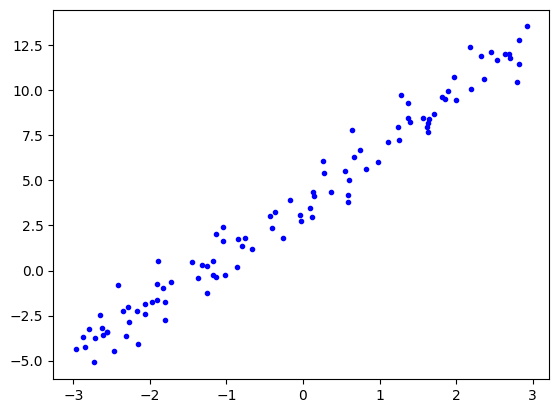

In [2]:
#we have created a random dataset
plt.plot(X, y, "b.")

In [3]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
print(X)
print(X_b)


[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]
 [-2.26777059]
 [-0.02893854]
 [-2.79366887]
 [ 2.45592241]
 [-1.44732011]
 [ 0.97513371]
 [-1.12973354]
 [ 0.12040813]
 [ 0.28026168]
 [-1.89087327]
 [ 2.81750777]
 [ 1.65079694]
 [ 2.63699365]
 [ 2.3689641 ]
 [ 0.58739987]
 [ 2.53124541]
 [-2.46904499]
 [-1.82410283]
 [-2.72863627]
 [-1.04801802]
 [-0.66793626]
 [-1.37190581]
 [ 1.97242505]
 [-0.85948004]
 [-1.31439294]
 [ 0.2561765 ]
 [-2.15445

In scikit-learn, the add_dummy_feature function is used to add a dummy feature to a dataset. This dummy feature is a column with a constant value (usually 1), which can be useful for certain types of linear models that require an intercept term.

Here's a basic example of how to use add_dummy_feature:

python
Copy code
import numpy as np
from sklearn.preprocessing import add_dummy_feature

# Create a sample dataset
X = np.array([[0, 1], [2, 3], [4, 5]])

# Add a dummy feature (column of ones)
X_with_dummy = add_dummy_feature(X)

print(X_with_dummy)

In [6]:
#we can easily calculate the normal equation and find the exact values of best weights and biases
theta_best =np.linalg.inv(X_b.T @ X_b)@X_b.T@ y

In [7]:
print(theta_best)

[[3.98520954]
 [2.92337113]]


In [11]:
X_new = np.array([[0], [2]])
print(X_new)
X_new_b = add_dummy_feature(X_new)
print(X_new_b)
y_predict = X_new_b @ theta_best
print(y_predict)

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]
[[3.98520954]
 [9.8319518 ]]


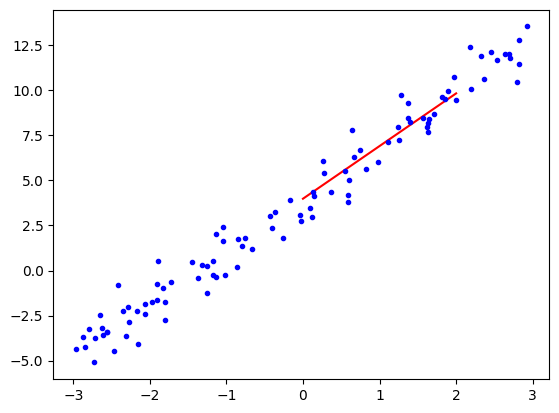

In [14]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
#so we can see that the values are same as we calculated using normal equation

[3.98520954] [[2.92337113]]


In [18]:
#lets implement graident descent from scratch
#d/d(theta) MSE(theta) = 2/m * X.T @ (X @ theta - y)
#theta_next = theta - learning_rate * d/d(theta) MSE(theta)
#we will use batch gradient descent
#we will use learning rate = 0.1
#we will use 1000 epochs
eta = 0.1
n_iterations = 1000
m=len(X_b)

In [23]:
print(m)
np.random.seed(42)
theta = np.random.randn(2, 1)
print(theta)
#theta is initialized randomly

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
print(theta)
#we get original value of theta which we got from linear_regression class

100
[[ 0.49671415]
 [-0.1382643 ]]
[[3.98520954]
 [2.92337113]]


# we implemented batch gradient descent..now we will try stochastic gradient descent
# takes random training set and uses it to calculate gradient descent